# ===============================================================
# -
#  -   -   Read in and process reservoir elevation, temperature and upstream/downstream temperature
# -
# ===============================================================

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
matplotlib.style.use('ggplot')

In [3]:
# from Joe's code
site_names = {'02323500': 'Suwannee R.',
             '02358000': 'Apalachicola R.',
             '02359000': 'Chipola R.',
             '02366500': 'Choctawhatchee R.',
             '02369000': 'Shoal R.'}

In [ ]:
# Osoyooos - Zosel dam - USGS has water level AND temperature (site # 12439000)
# Owyhee - reservoir elevation data but no BoR or USGS downstream data: http://www.usbr.gov/pn/hydromet/rtindex/owyhee.html
# Couldn't find any data from the Crab Creek Basin/central Columbia Basin Project



In [ ]:
# ========================================================================================================================
#          Steps to getting empirical data
# ========================================================================================================================

# Step 1: find a reservoir on the map (http://www.usbr.gov/pn/maps/pnmap.pdf 
#              OR https://upload.wikimedia.org/wikipedia/commons/e/ec/Pacific_Northwest_River_System.png)

# Step 2: a) find the reservoir on Bureau of Reclamation data (PNW and Montana, WYoming: http://www.usbr.gov/pn/hydromet/arcread.html)
            # OR search for the reservoir and "Bureau of Reclamation" since reservoir might not be on the dropdown tab
            # the teacup diagrams have abreviations (http://www.usbr.gov/pn/hydromet/select.html)
#         b) enter the abbreviation letter below)

# Step 3: find temperature data from the following sources:
#          a) Bureau of Reclamation (http://www.usbr.gov/pn/hydromet/realtime.html)
#          b) USGS (http://maps.waterdata.usgs.gov/mapper/nwisquery.html?URL=http://waterdata.usgs.gov/usa/nwis/dv?referred_module=sw&huc2_cd=17&site_tp_cd=LK&site_tp_cd=ST&index_pmcode_72019=1&index_pmcode_72243=1&index_pmcode_30208=1&index_pmcode_00010=1&index_pmcode_00011=1&format=sitefile_output&sitefile_output_format=xml&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=days&period=365&begin_date=2015-10-07&end_date=2016-10-05&date_format=YYYY-MM-DD&rdb_compression=file&list_of_search_criteria=huc2_cd%2Csite_tp_cd%2Crealtime_parameter_selection&column_name=site_tp_cd&column_name=dec_lat_va&column_name=dec_long_va&column_name=agency_use_cd)
#          c) NorWest (https://www.sciencebase.gov/gisviewer/NorWeST/)

# Step 4: fill out the lists below


In [10]:
# ========================================================================================================================
#           Reservoir (bureau of reclamation) AND temperature (USGS - number, bor - letters) data
# ========================================================================================================================

# DATA ORDER: reservoir name, resrvoir code, upstream gauge 1, upstream gauge 2, upstream gauge 3, downstream gauge 1, downstream gauge 2, downstream gauge 3
# NOTE: gagues #1 are closest to reservoir, #2 is next closest, etc. (so #3 upstream is most upstream, #3 is furthest downstream)
# map of Bureau of Reclamation dams http://www.usbr.gov/pn/maps/pnmap.pdf
# basin summaries: go to droptab on right  http://www.usbr.gov/pn/hydromet/realtime.html
# USGS gauge:   http://maps.waterdata.usgs.gov/mapper/nwisquery.html?URL=http://waterdata.usgs.gov/usa/nwis/dv?referred_module=sw&huc2_cd=17&site_tp_cd=LK&site_tp_cd=ST&index_pmcode_72019=1&index_pmcode_72243=1&index_pmcode_30208=1&index_pmcode_00010=1&index_pmcode_00011=1&format=sitefile_output&sitefile_output_format=xml&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=days&period=365&begin_date=2015-10-07&end_date=2016-10-05&date_format=YYYY-MM-DD&rdb_compression=file&list_of_search_criteria=huc2_cd%2Csite_tp_cd%2Crealtime_parameter_selection&column_name=site_tp_cd&column_name=dec_lat_va&column_name=dec_long_va&column_name=agency_use_cd

# NOTE: need to check this first set of data - I think most for "reservoirs_temp_bor" are downstream (not upstream)

reservoirs_temp_bor = [
    [  'Hungry Horse, MT',     'MT',    'HGH',    'NA','NA','NA',    'HGHM', 'NA','NA'  ],  #USGS site just downstream is '12362500'
    [  'Grand Coulee, WA',     'WA',   'GCL',    'CIBW','NA','NA',    'NA','NA','NA'], # CIBW is at canadian border
    [  'Rimrock Lake, WA',     'WA',    'RIM',    'NA','NA','NA',    'NA','NA','NA'],
    ['Keechelus Resservoir, WA','WA', 'KEE',    'NA','NA','NA',    'NA','NA','NA'],
    ['Kachess Reservoir, WA',  'WA',  'KAC',    'NA','NA','NA',    'NA','NA','NA'],
    [ 'Cle Elum Reservoir',    'WA', 'CLE',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Bumping Lake',         'WA', 'BUM',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Prosser Reservoir',   'WA',       'PRO',    'NA','NA','NA',    'NA','NA','NA'],
    [   'McKay Reservoir',     'OR',            'MCK',    'NA','NA','NA',    'NA','NA','NA'],
    [   'American Falls Reservoir',  'ID', 'AMF',    'NA','NA','NA',    'AMFI','NA','NA'],
    [   'Anderson Ranch Dam', 'ID',     'AND',    'BRFI','NA','NA',    'ANDI','NA','NA'],
    [   'Arrowrock Dam',           'ID',  'ARK',    'BTSI','NA','NA',    'NA','NA','NA'],
    [   'Lucky Peak Reservoir',           'ID',  'LUC',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Crane Praire Reservoir',           'OR',  'CRA',    'NA','NA','NA',    'CRAO','NA','NA'],
    [   'Crescent Lake',           'OR',  'CRE',    'NA','NA','NA',    'CREO','NA','NA'],
    [   'Cascade Reservoir',           'ID',  'CSC',    'NA','NA','NA',    'CSCI','NA','NA'],
    [   'Deadwood Dam',           'ID',  'DED',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Elwah Dam',           'WA',  'ELD',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Emigrant Lake',           'OR',  'EMI',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Black Canyon Dam',           'ID',  'EMM',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Glines Canyon Dam',           'WA',  'GLI',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Island Park',           'ID',  'ISL',    'NA','NA','NA',    'ISLI','NA','NA'],
    [   'Jackson Lake',           'WY','JCK',    'NA','NA','NA',    'JKSY','NA','NA'],
    [   'Milner Lake',           'ID',  'MIL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Lake Walcott',           'ID',  'MIN',    'NA','NA','NA',    'MINI','NA','NA'],
    [   'Ochoco Reservoir',           'OR',  'OCH',    'OCRO','NA','NA',    'OCHO','NA','NA'],
    [   'Lake Owyhee',           'OR',  'OWY',    'ROMO','NA','NA',    'NA','NA','NA'],
    [   'Palisades Reservoir',           'ID',  'PAL',    'NA','NA','NA',    'PALI','NA','NA'],
    [   'Payette Lake',           'ID',  'PAY',    'NA','NA','NA',    'PAYI','NA','NA'],
    [   'Phillips Lake',           'OR',  'PHL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Potholes Reservoir',           'WA',  'POT',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Ririe Lake',           'ID',  'RIR',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Scoggins Dam',           'OR',  'SCO',    'NA','NA','NA',    'SCOO','NA','NA'],
    [   'Soliders Meadow Reservoir',           'ID',  'SOL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Thief Valley Dam',           'OR',  'THF',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Thompson Reservoir',           'OR',  'THM',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Warm Springs Reservoir',           'OR',  'WAR',    'NA','NA','NA',    'WARO','NA','NA'],
    [   'Wickiup Reservoir',           'OR',  'WIC',    'NA','NA','NA',    'WICO','NA','NA'],
    [   'Wildhorse Reservoir',           'NV',  'WLD',    'NA','NA','NA',    'WLDN','NA','NA'],
    [   'Name',           'STATE',  'BUORID',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Name',           'STATE',  'BUORID',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Name',           'STATE',  'BUORID',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Name',           'STATE',  'BUORID',    'NA','NA','NA',    'NA','NA','NA']
    ]

reservoirs_temp_usgs = [
    [  'Hungry Horse, MT',     'HGH',    'NA','NA','NA',    '12362500', '12363000','NA'  ],  #USGS site just downstream is '12362500'
    [  'Grand Coulee, WA',      'GCL',    'NA','NA','NA',    'NA','NA','NA'], # CIBW is at canadian border
    [  'Rimrock Lake, WA',      'RIM',    'NA','NA','NA',    '12493005','NA','NA'],
    ['Keechelus REsservoir, WA','KEE',    '12473980','NA','NA',    'NA','NA','NA'],
    ['Kachess Reservoir, WA',   'KAC',    'NA','NA','NA',    'NA','NA','NA'],
    [ 'Cle Elum Reservoir', 'WA', 'CLE',    '12509060','NA','NA',    '12510500','NA','NA'],
    [   'Bumping Lake'      'WA', 'BUM',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Prosser Reservoir',      'WA',       'PRO',    'NA','NA','NA',    'NA','NA','NA'],
    [   'McKay Reservoir', 'OR',            'MCK',    'NA','NA','NA',    'NA','NA','NA'],
    [   'American Falls Reservoir',  'ID', 'AMF',    '13077000','NA','NA',    '13069500','13060000','NA'],
    [   'Anderson Ranch Dam', 'ID',            'AND',    '13186000','NA','NA',    '13190500','13192200','NA'],
    [   'Arrowrock Dam',           'ID',  'ARK',    '13185000','13192200','NA',    'NA','NA','NA'],
    [   'Lucky Peak Reservoir',           'ID',  'LUC',    '13200000','NA','NA',    '13203510','13203760','13206000'],
    [   'Crane Praire Reservoir',           'OR',  'CRA',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Crescent Lake',           'OR',  'CRE',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Cascade Reservoir',           'ID',  'CSC',    '13239000','NA','NA',    '13245000','13246000','13238000'],
    [   'Deadwood Dam',           'ID',  'DED',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Elwah Dam',           'WA',  'ELD',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Emigrant Lake',           'OR',  'EMI',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Black Canyon Dam',           'ID',  'EMM',    '13238000','13246000','NA',    '13249500','13251000','NA'],
    [   'Glines Canyon Dam',           'WA',  'GLI',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Island Park',           'ID',  'ISL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Jackson Lake',           'WY','JCK',    '13010065','NA','NA',    '13013650','NA','NA'],
    [   'Milner Lake',           'ID',  'MIL',    '13081500','NA','NA',    '13087995','NA','NA'],
    [   'Lake Walcott',           'ID',  'MIN',    '13077000','NA','NA',    '13081500','NA','NA'],
    [   'Ochoco Reservoir',           'OR',  'OCH',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Lake Owyhee',           'OR',  'OWY',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Palisades Reservoir',           'ID',  'PAL',    '13027500','NA','NA',    '13022500','13013650','NA'],
    [   'Payette Lake',           'ID',  'PAY',    'NA','NA','NA',    '13239000','NA','NA'],
    [   'Phillips Lake',           'OR',  'PHL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Potholes Reservoir',           'WA',  'POT',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Ririe Lake',           'ID',  'RIR',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Scoggins Dam',           'OR',  'SCO',    'NA','NA','NA',    '14202980','NA','NA'],
    [   'Soliders Meadow Reservoir',           'ID',  'SOL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Thief Valley Dam',           'OR',  'THF',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Thompson Reservoir',           'OR',  'THM',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Warm Springs Reservoir',           'OR',  'WAR',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Wickiup Reservoir',           'OR',  'WIC',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Wildhorse Reservoir',           'NV',  'WLD',    'NA','NA','NA',    'NA','NA','NA']

    ]
   
# sites without upstrteam/downstream data OR no
# Concunully Reservoir, WA


In [11]:
# ========================================================================================================================
#                           Reservoir (bureau of reclamation) AND temperature (NorWest) data
# ========================================================================================================================

# DATA ORDER: reservoir name,state, resrvoir code, upstream gauge 1, upstream gauge 2, upstream gauge 3, downstream gauge 1, downstream gauge 2, downstream gauge 3
# NOTE: gagues #1 are closest to reservoir, #2 is next closest, etc. (so #3 upstream is most upstream, #3 is furthest downstream)
# map of Bureau of Reclamation dams http://www.usbr.gov/pn/maps/pnmap.pdf
# basin summaries: go to droptab on right  http://www.usbr.gov/pn/hydromet/realtime.html
# NorWest dat - used "PERMA_FID" - since it's the unique ID to that site (OBSPRED_ID is for a specific site AND year)

reservoirs_temp_norwest = [
    [  'Hungry Horse', 'MT',     'HGH',    '13923','NA','NA',    'NA', 'NA','NA'  ],  #
    [  'Grand Coulee', 'WA',      'GCL',    'NA','NA','NA',    'NA','NA','NA'], # NO sites upstream of Grand Coulee,
    [  'Rimrock Lake', 'WA',      'RIM',    'NA','NA','NA',    'NA','NA','NA'],
    ['Keechelus REsservoir','WA', 'KEE',    'NA','NA','NA',    '16073','23796','16069'],
    ['Kachess Reservoir, WA',   'KAC',    'NA','NA','NA',    '15840','16070','NA'],
    [ 'Cle Elum Reservoir', 'WA', 'CLE',    '23792','NA','NA',    '15840','16070','NA'],
    [   'Bumping Lake'      'WA', 'BUM',    '15827','NA','NA',    '1423','23773','NA'],
    [   'Prosser Reservoir',      'WA',       'PRO',    '5082','1523','NA',    '15823','1525','5083'],
    [   'McKay Reservoir', 'OR',            'MCK',    '3307','3193','3209',    '3203','3204','NA'],
    [   'American Falls Reservoir',  'ID', 'AMF',    '4794','4792','4786',    '2684','NA','NA'],  # some are USGS
    [   'Anderson Ranch Dam', 'ID',            'AND',    '10245','19081','18493',    '19080','12535','NA'],
    [   'Arrowrock Dam',           'ID',  'ARK',    '19079','10231','NA',    'NA','NA','NA'],
    [   'Lucky Peak Reservoir',           'ID',  'LUC',    'NA','NA','NA',    '4844','4846','4847'],
    [   'Crane Praire Reservoir',           'OR',  'CRA',    '7414','NA','NA',    '20828','20874','NA'],
    [   'Crescent Lake',           'OR',  'CRE',    'NA','NA','NA',    '5347','20582','20621'],
    [   'Cascade Reservoir',           'ID',  'CSC',    '4853','NA','NA',    '2697','NA','NA'],
    [   'Deadwood Dam',           'ID',  'DED',    '12473','19083','12470',    '1435','12472','19091'],
    [   'Elwah Dam',           'WA',  'ELD',    '19998','25965','25983',    '25989','25974','25956'],
    [   'Emigrant Lake',           'OR',  'EMI',    '15828','8135','NA',    '1413','1404','1412'],
    [   'Black Canyon Dam',           'ID',  'EMM',    'NA','NA','NA',    '4857','NA','NA'], #a USGS site
    [   'Glines Canyon Dam',           'WA',  'GLI',     '25966','NA','NA',    '25991','25990','19998'],
    [   'Island Park',           'ID',  'ISL',    '17572','NA','NA',    '17582','17609','17573'],
    [   'Jackson Lake',           'WY','JCK',    '17533','NA','NA',    '17540','NA','NA'], # HAS data from USGS
    [   'Milner Lake',           'ID',  'MIL',    '4800','NA','NA',    '2685','2686','2687'],
    [   'Lake Walcott',           'ID',  'MIN',    '2684','NA','NA',    '4800','NA','NA'],
    [   'Ochoco Reservoir',           'OR',  'OCH',   '20110','1480','20115',    '20094','20095','20720'],
    [   'Lake Owyhee',           'OR',  'OWY',    '5099','1495','5098',    '1481','NA','NA'],
    [   'Palisades Reservoir',           'ID',  'PAL',    'NA','NA','NA',    '17563','NA','NA'], # did not put in USGS data
    [   'Payette Lake',           'ID',  'PAY',    '278','8903','NA',    '4853','NA','NA'], #downstream is USGS site
    [   'Phillips Lake',           'OR',  'PHL',    '1488','1933','NA',    '19121','NA','NA'],
    [   'Potholes Reservoir',           'WA',  'POT',    'NA','NA','NA',    '20056','NA','NA'],
    [   'Ririe Lake',           'ID',  'RIR',    '16965','16928','16963',    '4791','NA','NA'],
    [   'Scoggins Dam',           'OR',  'SCO',    '1497','5616','NA',    '1498','NA','NA'],
    [   'Soliders Meadow Reservoir',           'ID',  'SOL',    'NA','NA','NA',    '3164','NA','NA'],
    [   'Thief Valley Dam',           'OR',  'THF',    'NA','NA','NA',    '19094','NA','NA'],
    [   'Thompson Reservoir',           'OR',  'THM',    '23572','NA','NA',    '23689','23384','23381'],
    [   'Warm Springs Reservoir',           'OR',  'WAR',    '18167','17843','18169',    '1516','17840','NA'],
    [   'Wickiup Reservoir',           'OR',  'WIC',    '20874','20828','NA',    '20825','20847','20904'],
    [   'Wildhorse Reservoir',           'NV',  'WLD',    'NA','NA','NA',    '15846','NA','NA']
    ]
    
#  Data oder (after reservoir info)

trib_temp_norwest = [
    [  'Hungry Horse, MT', 'HGH',    '13921','1676','2134',    'NA', 'NA','NA'  ],  #flows into whitefish soon after dam outlet
    [  'Grand Coulee, WA',  'GCL',    '23909','23903','NA',    'NA','NA','NA'], # hits Chief Joseph dam
    [  'Rimrock Lake, WA',  'RIM',    '24137','23765','NA',    '24158','23780','23849'],
    ['Keechelus REsservoir, WA','KEE',    '23798','16076','NA',    '16066','NA','NA'],
    ['Kachess Reservoir, WA',   'KAC',    '16400','23799','NA',    'NA','NA','NA'],
    [ 'Cle Elum Reservoir', 'WA', 'CLE',    '23794','23795','NA',    'NA','NA','NA'],
    [   'Bumping Lake'      'WA', 'BUM',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Prosser Reservoir',      'WA',       'PRO',    '16418','24366','24339',    '184','NA','NA'],
    [   'McKay Reservoir', 'OR',            'MCK',    'NA','NA','NA',    'NA','NA','NA'],
    [   'American Falls Reservoir',  'ID', 'AMF',    '905','NA','NA',    'NA','NA','NA'],
    [   'Anderson Ranch Dam', 'ID',            'AND',    '18500','18484','18781',    '2387','NA','NA'],
    [   'Arrowrock Dam',           'ID',  'ARK',    '18848','NA','NA',    'NA','NA','NA'],
    [   'Lucky Peak Reservoir',           'ID',  'LUC',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Crane Praire Reservoir',           'OR',  'CRA',    '20894','20866','20865',    'NA','NA','NA'],
    [   'Crescent Lake',           'OR',  'CRE',    '20986','12550','NA',    'NA','NA','NA'],
    [   'Cascade Reservoir',           'ID',  'CSC',    '12433','NA','NA',    'NA','NA','NA'],
    [   'Deadwood Dam',           'ID',  'DED',    '12517','NA','NA',    '2266','3088','NA'],
    [   'Elwah Dam',           'WA',  'ELD',    'NA','NA','NA',    '25972','NA','NA'],
    [   'Emigrant Lake',           'OR',  'EMI',    'NA','NA','NA',    '1477','NA','NA'],
    [   'Black Canyon Dam',           'ID',  'EMM',    '2318','18269','NA',    'NA','NA','NA'],
    [   'Glines Canyon Dam',           'WA',  'GLI',     '25968','25960','NA',    '25961','25984','NA'],
    [   'Island Park',           'ID',  'ISL',    '17597','17126','16997',    '17618','17601','NA'],
    [   'Jackson Lake',           'WY','JCK',    'NA','NA','NA',    '17547','17550','NA'],
    [   'Milner Lake',           'ID',  'MIL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Lake Walcott',           'ID',  'MIN',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Ochoco Reservoir',           'OR',  'OCH',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Lake Owyhee',           'OR',  'OWY',    'NA','NA','NA',    '2693','4849','NA'],
    [   'Palisades Reservoir',           'ID',  'PAL',    '3472','3465','16973',    'NA','NA','NA'],
    [   'Payette Lake',           'ID',  'PAY',    '8874','NA','NA',    'NA','NA','NA'],
    [   'Phillips Lake',           'OR',  'PHL',    '9949','9948','9953',    '10114','NA','NA'],
    [   'Potholes Reservoir',           'WA',  'POT',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Ririe Lake',           'ID',  'RIR',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Scoggins Dam',           'OR',  'SCO',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Soliders Meadow Reservoir',           'ID',  'SOL',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Thief Valley Dam',           'OR',  'THF',    'NA','NA','NA',    'NA','NA','NA'],
    [   'Thompson Reservoir',           'OR',  'THM',    'NA','NA','NA',    '23681','NA','NA'],
    [   'Warm Springs Reservoir',           'OR',  'WAR',    '18196','NA','NA',    'NA','NA','NA'],
    [   'Wickiup Reservoir',           'OR',  'WIC',    '20984','NA','NA',    'NA','NA','NA'],
    [   'Wildhorse Reservoir',           'NV',  'WLD',    'NA','NA','NA',    'NA','NA','NA']
    ]
# sites without upstrteam/downstream data
# Concunully Reservoir, WA




In [5]:
# U.S. bureau of rec dams/reservoirs without temperature data: Rosa reservoir (yakima), Wells, Chelan, Rocky Reach, Rock Island, Wanapum, Concunully,
#                                           Theif Valley (oregon), Malheur Reservoir (on Willow Creek), 

# NOTE: some of reservoir names are different from dam names (i.e. Chandler dam holds back Prosser Reservoir)

# Not in Bureau of Reclamation reservoir elevation list OR doesn't have temperature (i.e. elevation data present, BUT no temperature upstream/downstream):  
# from this list: http://www.usbr.gov/pn/hydromet/arcread.html
#         Agate dam, OR, BUlly Creek, ID, Cold Springs Dam, OR, Haystack Reservoir (near Culver, OR), Henry's Lake (ID),
#        Howard Prairie Lake (OR), Hyatt dam (OR), Lake Lowell (ID), Mann Creek Dam (ID), Unity Reservoir (OR),
#        Lake Waha (ID), Clear Lake (OR), Little Wood Reservoir (ID)


In [27]:
# NorWest site IDS and year IDs
# keys are site IDs (PERMA_FID) and the values are the year IDs (OBSPRED_ID) that are in the excels
site_ID_and_year_ID = {16073: [2296,2338], 
             23796: [1175, 1249, 1410, 1492, 1579, 1704, 1826, 1899], 
             16069: 2295,
            23799: [962, 989, 1096,1160,1234, 1473, 1560],
            16400: [2228],
        15840:[676,679, 682, 685,688, 690, 691 ],
        16070: [2341],
        15840: [676,679, 682, 685, 688, 690, 691 ],
        16070: [2341 ],
        1423: [719,727,736,747,758,769,780,790,799,810,820,829,839],
        15827: [675,678,681,684],  # upstream of BUmping lake
         23792: [1131, 1271, 1359,1436,1659,1777,1849],
        3204: [3151,3178,3203,3228,3280,3328,3381 ], # downstream of McKay reservoir (oregon)
        3193: [3152, 3423],  # upstream of McKay Reservoir
        2684: [380,385, 391, 396,401, 405, 407, 411, 413, 417, 421, 424, 427  ],   # American Reseroir Upstream
        4794: [889,915, 937, 948,969, 975, 995, 1006, 1014, 1022, 1029  ], # downstream of American Reseroivr - is a USGS site
        20874: [4228, 4236, 4276, 4325, 4361,4407, 4458, 4509, 4569,4627, 4728,4763, 4824   ],  # downstream of Crane Prairie Reservoir
        20768: [4247, 4296,4328, 4410,4510, 4572, 4630, 4729, 4764, 4827, 4855  ], # upstream of Crane Prairie Reservoir 
        20582: [4318, 4451, 4556, 4616],  # downstream of Cresent Lake
        19998: [3296, 3333, 3368,3422,3478,3510,3544,3569,3598,3620,3636  ], # downstream of Gline Canyon Dam
        20094: [960, 968, 978, 987,1001,1025,  ],  # Ochooco Reservoir - downstream
        1480: [3987,3988,3989,3990,3991,3992,3994,3996,3998,4001,4005,4009], # upsteam of Ochooco Reservoir
        19121: [198, 217, 232,245 ],  # downstream of Phillips Lake
        20056: [2350, 2363,2396,2436,2467,2500 ],
        1497: [4929, 4939, 4952, 4965, 4980], # Scoggins Dam upstream
        1498: [4930,4940, 4953, 4966,4981, 4995], # Scoggins Dam downstream - note there are more at same site (from USGS)   
        1413: [4920,4925,4932,4943,4956,4970,4985] # Emigrant Lake downstream (at bear creek)
        } 

In [8]:
site_ID_and_year_ID[1423]

[719, 727, 736, 747, 758, 769, 780, 790, 799, 810, 820, 829, 839]

In [13]:
# ------------------ read in NorWest excel files -----------------
stream_temp_NorWest_path = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps'
all_files = [f for f in listdir(stream_temp_NorWest_path) if isfile(join(stream_temp_NorWest_path, f))]
len(all_files)


14

In [10]:
reservoirs_Bur_of_Rec[1][1]

NameError: name 'reservoirs_Bur_of_Rec' is not defined

In [4]:
# ------------------ read in OREGON NorWest excel files -----------------
stream_temp_NorWest_path = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps'
all_files = [f for f in listdir(stream_temp_NorWest_path) if isfile(join(stream_temp_NorWest_path, f))]
print(all_files)
data_norwest = pd.read_csv(stream_temp_NorWest_path + '/' + all_files[12])  
    # Oregon - pos 12, 
    
    
if 'SampleDate' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['SampleDate'], format='%m/%d/%Y %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'Date' in data_norwest.columns:
    data_norwest['Date'] =  pd.to_datetime(data_norwest['Date'], format='%Y-%m-%d')
    data_norwest = data_norwest.set_index(data_norwest['Date'])
    data_norwest['DATE'] = data_norwest['Date']
    data_norwest['DAILYMEAN'] = data_norwest['DailyMean']

['NorWeST_ObservedStreamTempDailySummaries_CentralCalifornia_AllDays.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_Clearwater.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_CoastalCalifornia_AllDays.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_KlamathNorthernCalifornia_AllDays.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_MiddleColumbia.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_MiddleSnake.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_MissouriHW.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_ORSouthCentral.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_Salmon.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_SnakeBear.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_Spokoot.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_UppColYak.xlsx', 'NorWeST_ObservedStreamTempDailySummaries_OregonCoast_AllDays.txt', 'NorWeST_ObservedStreamTempDailySummaries_WACoa_PS.xlsx']


In [1]:
# ------------------ read in NorWest excel files -----------------
stream_temp_NorWest_path = '/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps'
all_files = [f for f in listdir(stream_temp_NorWest_path) if isfile(join(stream_temp_NorWest_path, f))]
print(all_files)
#data_norwest = pd.read_excel(stream_temp_NorWest_path + '/' + all_files[12])
   # position 11 is Upper Yakima, position 4 - mid Columbia, Snake-Bear = position 9, WACoast - 13, midSnake - 5

# oregon data in .txt file    
data_norwest = pd.read_table(stream_temp_NorWest_path + '/' + all_files[11], sep=',')
    # Oregon - pos 12,
    
if 'SampleDate' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['SampleDate'], format='%Y-%m-%d %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'DATE' in data_norwest.columns:
    data_norwest['DATE'] =  pd.to_datetime(data_norwest['SampleDate'], format='%Y-%m-%d %H:%M:%S')
    data_norwest = data_norwest.set_index(data_norwest['DATE'])
    
if 'Date' in data_norwest.columns:
    data_norwest['Date'] =  pd.to_datetime(data_norwest['Date'], format='%Y-%m-%d')
    data_norwest = data_norwest.set_index(data_norwest['Date'])
    data_norwest['DATE'] = data_norwest['Date']
    data_norwest['DAILYMEAN'] = data_norwest['DailyMean']

NameError: name 'listdir' is not defined

In [12]:
stream_temp_NorWest_path + '/' + all_files[12]

'/raid3/rniemeyr/reservoir_stream_temp_empirical_project/data/NorWest/stream_temps/NorWeST_ObservedStreamTempDailySummaries_OregonCoast_AllDays.txt'

In [13]:
data_norwest.tail()

,OBSPRED_ID,NorWeST_ID,SampleYear,SampleDate,DailyMax,DailyMin,DailyMean,DailySD,Nobs,DailyRange,DATE
DATE,,,,,,,,,,,
2011-09-29,7635.0,OregonCoast_7635,2011.0,9/29/2011 0:00:00,13.32,9.31,11.35,1.43,48,4.01,2011-09-29
2011-09-30,7635.0,OregonCoast_7635,2011.0,9/30/2011 0:00:00,13.83,10.29,12.06,1.23,48,3.54,2011-09-30
2011-10-01,7635.0,OregonCoast_7635,2011.0,10/1/2011 0:00:00,12.50,11.12,11.73,0.46,48,1.38,2011-10-01
2011-10-02,7635.0,OregonCoast_7635,2011.0,10/2/2011 0:00:00,11.20,9.23,10.39,0.62,48,1.97,2011-10-02
2011-10-03,7635.0,OregonCoast_7635,2011.0,10/3/2011 0:00:00,10.56,9.48,10.06,0.31,48,1.08,2011-10-03


In [28]:
# ---------------- Downstream --------------

#Cle Elum reservoir: 15840, Kachess: 15840 , Keechelus: 23796, Bumping Lake: 1423, upstream of bumping lake: 15827
# upstream of Cle Elum: 23792, upstream of American Reservoir: 2684, downstream of Crane Prairie Res: 20874
# downstream of Crescent Lake: 20582 , downstream of Elwah reservoir: 19998, Ochoco Reservoir: 20094, Phillips Lake: 19121
#  downstream of Potholes Res: 20056, downstream Scoggins Dam: 1498, emigrant lake: 1413
data_norwest_downstream = data_norwest.loc[data_norwest['OBSPRED_ID'].isin(site_ID_and_year_ID[1413])]   
data_norwest_downstream['year'] = data_norwest_downstream.DATE.dt.year

KeyError: 'OBSPRED_ID'

In [24]:
#Cle Elum reservoir: 15840, Kachess: 15840 , Keechelus: 23796, Bumping Lake: 1423, upstream of bumping lake: 15827
# upstream of Cle Elum: 23792, updatream of McKay: 3193, downstream of McKay: 3204, upstream of American res: 4794,
# upstream of Crane Prairie res: 20768, Ochoco Res Upstream: 1480, upstream Scoggins Dam: 1497
data_norwest_upstream = data_norwest.loc[data_norwest['OBSPRED_ID'].isin(site_ID_and_year_ID[1497])]   
data_norwest_upstream['year'] = data_norwest_upstream.DATE.dt.year

/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
data_norwest_downstream.head()

,OBSPRED_ID,NorWeST_ID,SampleYear,SampleDate,DailyMax,DailyMin,DailyMean,DailySD,Nobs,DailyRange,DATE,year
DATE,,,,,,,,,,,,
2006-03-03,4930.0,OregonCoast_4930,2006.0,3/3/2006 0:00:00,6.72,6.27,6.55,0.12,42,0.45,2006-03-03,2006
2006-03-04,4930.0,OregonCoast_4930,2006.0,3/4/2006 0:00:00,6.38,5.94,6.13,0.14,96,0.44,2006-03-04,2006
2006-03-05,4930.0,OregonCoast_4930,2006.0,3/5/2006 0:00:00,6.27,5.94,6.08,0.09,95,0.32,2006-03-05,2006
2006-03-06,4930.0,OregonCoast_4930,2006.0,3/6/2006 0:00:00,6.33,6.00,6.14,0.10,96,0.33,2006-03-06,2006
2006-03-07,4930.0,OregonCoast_4930,2006.0,3/7/2006 0:00:00,6.66,5.94,6.23,0.21,95,0.72,2006-03-07,2006


# --------------------- site information -----------------------

## Hungray Horse
### on South Fork of Flat head, and runs into Mainstem of the Flatheat soon after outlet of reservoir (US Bureau of Rec code CFMM for mainstem Flathead River
### list of data for reservoir http://www.usbr.gov/pn/hydromet/rtindex/flathead.html
### maps with sites above/below reservoir: http://www.fs.usda.gov/Internet/FSE_DOCUMENTS/stelprd3842665.pdf
## -
## 



In [6]:
# ------------------ read in the reservoir data ------------

from climata.hydromet import MultiStationDailyIO 

sitex = "EMI" #SCO was here before  
date1 = "1990-05-01"
date2 = "2015-12-31"
parameterx = 'fb'   # fb = surface elevatoin (ft), qd - daily average stream discharge (cfs), pc = precip (inches), 
                   # mm = average air temp (deg F), wy = average water temperature (celsius)


data = MultiStationDailyIO(
    start_date=date1,
    end_date=date2,
    station=sitex,
    parameter=parameterx,
)

data2 = []
for series in data:
    #print(series)
    for row in series.data:
        data2.append(row[1])
        #print(row)
        
data3 = pd.DataFrame(data2,index=pd.date_range(date1,date2))
data4 = data3.convert_objects(convert_numeric=True)
data4.columns = ['res_level']

/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/IPython/kernel/__main__.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [7]:
data4.head()

,res_level
1990-05-01,2236.79
1990-05-02,2236.76
1990-05-03,2236.73
1990-05-04,2236.59
1990-05-05,2236.23


In [8]:
data4.head()   # data3.ix['2006-05-01':'2006-06-01']

,res_level
1990-05-01,2236.79
1990-05-02,2236.76
1990-05-03,2236.73
1990-05-04,2236.59
1990-05-05,2236.23


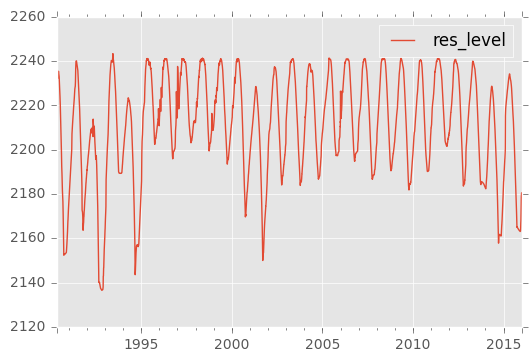

In [9]:
data4.plot()

In [28]:
# ========================== Downstream data ================================
merged_data_downstream = data4.merge(data_norwest_downstream, how='inner', left_index=True, right_index=True)

In [29]:
# ========================== Upstream data ================================
merged_data_upstream = data4.merge(data_norwest_upstream, how='inner', left_index=True, right_index=True)

In [30]:
merged_data_downstream.tail() 

,res_level,OBSPRED_ID,NorWeST_ID,SampleYear,SampleDate,DailyMax,DailyMin,DailyMean,DailySD,Nobs,DailyRange,DATE,year
2011-12-26,284.76,4995.0,OregonCoast_4995,2011.0,12/26/2011 0:00:00,7.05,6.96,7.01,0.01,96,0.08,2011-12-26,2011
2011-12-27,284.64,4995.0,OregonCoast_4995,2011.0,12/27/2011 0:00:00,7.01,6.92,6.96,0.02,96,0.08,2011-12-27,2011
2011-12-28,285.53,4995.0,OregonCoast_4995,2011.0,12/28/2011 0:00:00,7.10,6.92,6.98,0.03,96,0.18,2011-12-28,2011
2011-12-29,286.91,4995.0,OregonCoast_4995,2011.0,12/29/2011 0:00:00,7.10,7.01,7.05,0.02,96,0.08,2011-12-29,2011
2011-12-30,288.71,4995.0,OregonCoast_4995,2011.0,12/30/2011 0:00:00,7.13,7.01,7.09,0.03,96,0.12,2011-12-30,2011


In [60]:
merged_data_upstream.tail()

,res_level,OBSPRED_ID,DATE,DAILYMINIMUM,DAILYMEAN,DAILYMAXIMUM,NOBS,STATUS,MEANFLAG,year
2011-08-27,3116.90,4009,2011-08-27,57.94,64.861875,72.21,96.0,P,NaN,2011
2011-08-28,3116.66,4009,2011-08-28,59.19,63.678333,68.18,96.0,P,NaN,2011
2011-08-29,3116.43,4009,2011-08-29,55.16,61.749063,68.64,96.0,P,NaN,2011
2011-08-30,3116.21,4009,2011-08-30,54.83,60.517604,66.08,96.0,P,NaN,2011
2011-08-31,3116.02,4009,2011-08-31,52.02,57.404167,62.58,96.0,P,S,2011


In [73]:
merged_data_downstream.index.year

array([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
       1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1999, 1999,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
       1999, 1999, 1999, 1999, 1999, 1999, 1999, 2002, 2002, 2002, 2002,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
       2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002,
       2002, 2002, 2002, 2002, 2002, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 20

/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


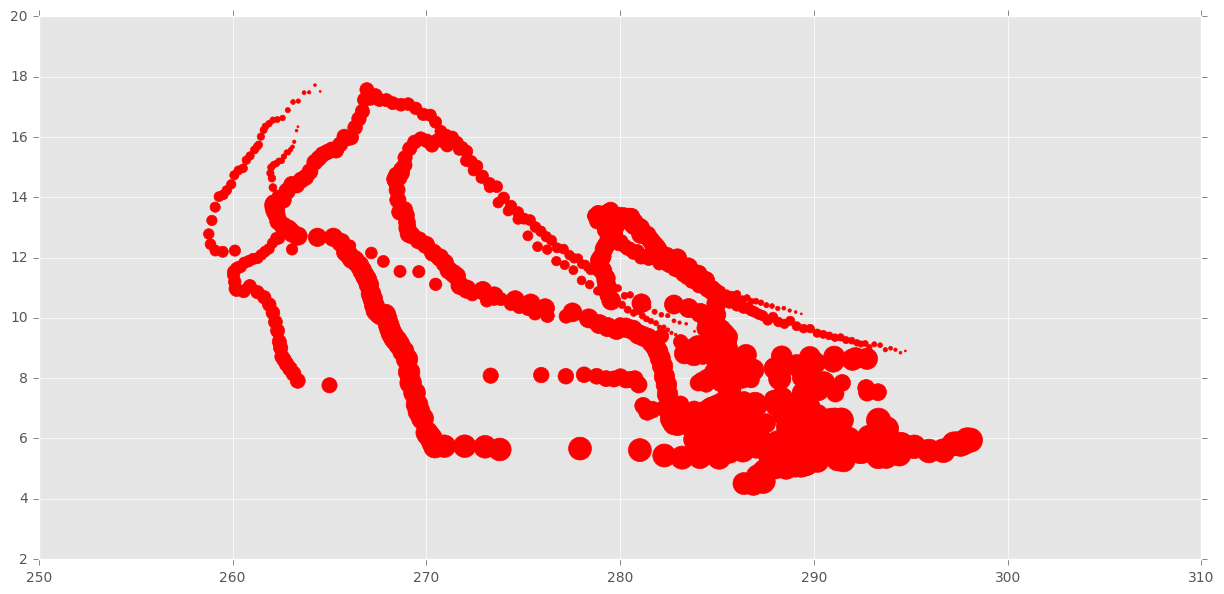

In [34]:
plt.figure(figsize=[15,7])

plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DailyMean, color='red', 
             s=( (merged_data_upstream.index.dayofyear-212)*2 ) )    # RBM (yixin) - segment 1

/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


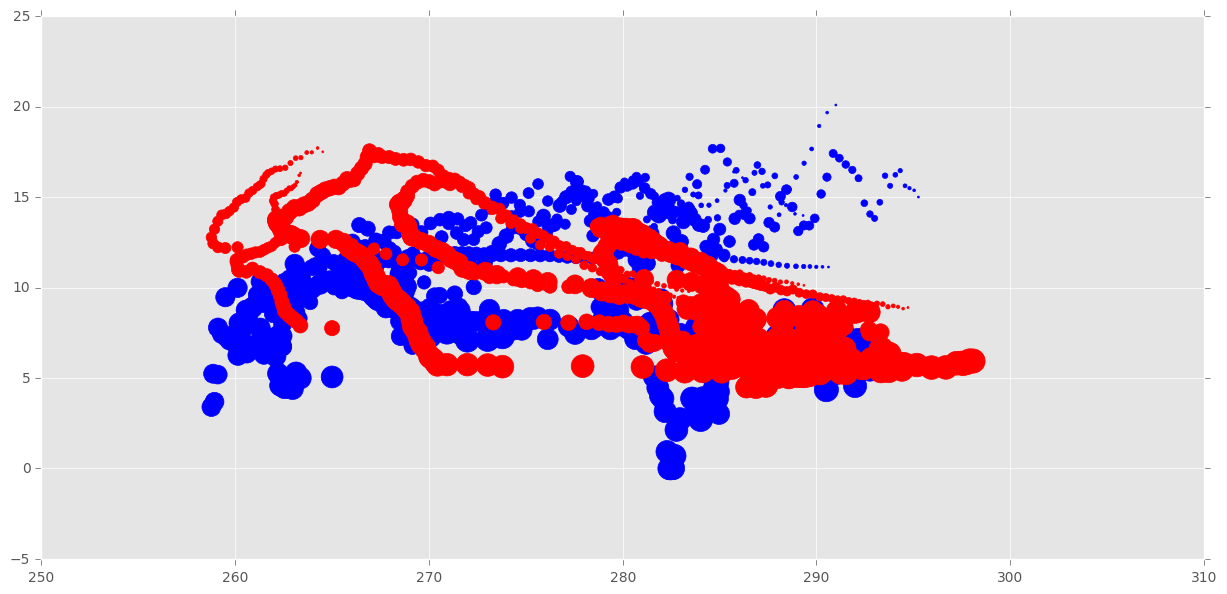

In [32]:
plt.figure(figsize=[15,7])

plt.scatter(merged_data_upstream.res_level,merged_data_upstream.DailyMean, color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 )  )    # 
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DailyMean, color='red' , 
             s=( (merged_data_upstream.index.dayofyear-212)*2 ) )    # RBM (yixin) - segment 1

In [ ]:
plt.figure(figsize=[15,7])

plt.scatter(merged_data_upstream.res_level,merged_data_upstream.DAILYMEAN, color='blue' )    # 
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color='red')    # RBM (yixin) - segment 1

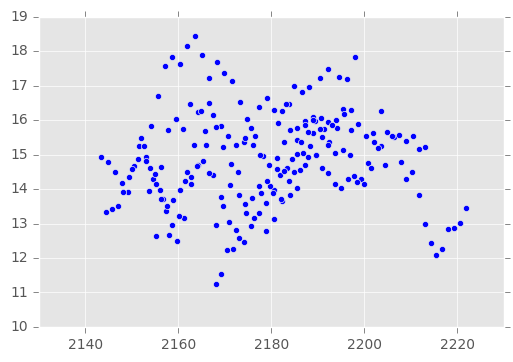

In [200]:
plt.scatter(merged_data_upstream.res_level,merged_data_upstream.DAILYMEAN )
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN )

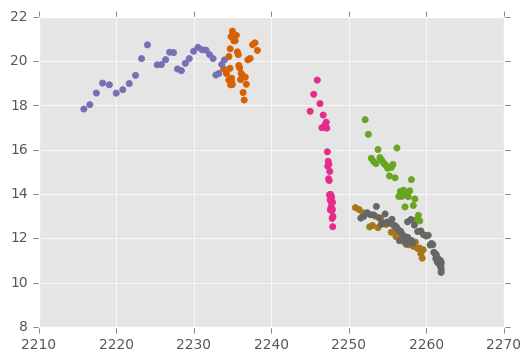

In [131]:
yearx = (merged_data.year - 2003)/(merged_data.year.max() - merged_data.year.min())
years_color =  merged_data.year ** 2 / (1 + merged_data.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.scatter(merged_data.res_level,merged_data.DAILYMEAN, color=Blues(yearx))

In [149]:
merged_data.tail()

,res_level,OBSPRED_ID,DATE,DAILYMINIMUM,DAILYMEAN,DAILYMAXIMUM,NOBS,STATUS,MEANFLAG,year
2010-08-27,2460.20,1899,2010-08-27,15.24,15.716250,16.19,48,P,NaN,2010
2010-08-28,2459.82,1899,2010-08-28,12.59,15.239792,17.78,48,P,NaN,2010
2010-08-29,2459.51,1899,2010-08-29,13.67,15.158125,16.67,48,P,NaN,2010
2010-08-30,2459.33,1899,2010-08-30,12.74,14.381875,15.72,48,P,NaN,2010
2010-08-31,2459.47,1899,2010-08-31,13.06,13.487083,13.82,48,P,NaN,2010


In [ ]:
# =============================================================================================================
#                                   Plot to save and run once (don't re-run - unless the same data)
# =============================================================================================================


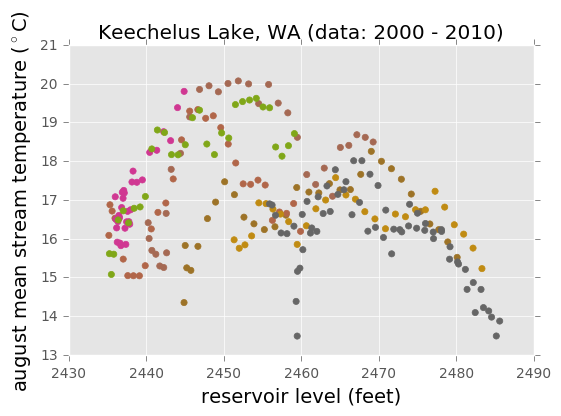

In [150]:
yearx = (merged_data.year - 1999)/(merged_data.year.max() - merged_data.year.min())
years_color =  merged_data.year ** 2 / (1 + merged_data.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Keechelus Lake, WA (data: 2000 - 2010)')
plt.scatter(merged_data.res_level,merged_data.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

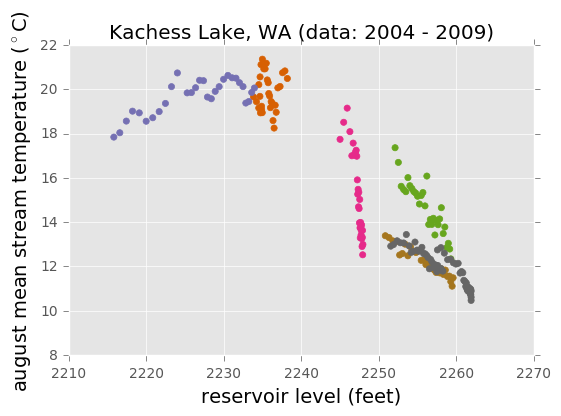

In [133]:
yearx = (merged_data.year - 2003)/(merged_data.year.max() - merged_data.year.min())
years_color =  merged_data.year ** 2 / (1 + merged_data.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Kachess Lake, WA (data: 2004 - 2009)')
plt.scatter(merged_data.res_level,merged_data.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

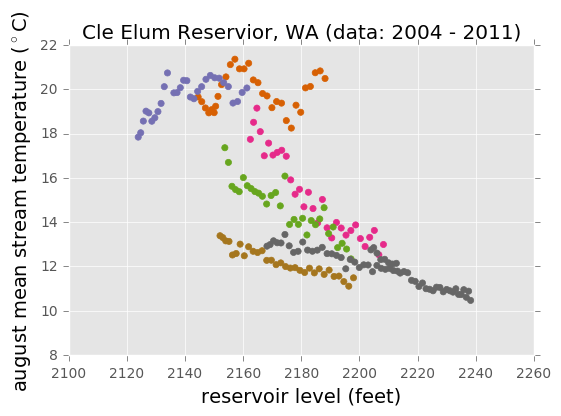

In [160]:
yearx = (merged_data.year - 2003)/(merged_data.year.max() - merged_data.year.min())
years_color =  merged_data.year ** 2 / (1 + merged_data.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Cle Elum Reservior, WA (data: 2004 - 2011)')
plt.scatter(merged_data.res_level,merged_data.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

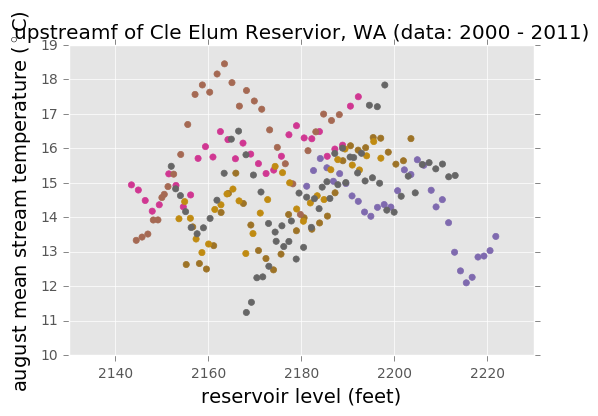

In [201]:
# NOTE: this id downstream of Cle Elum - for comparison
yearx = (merged_data.year - 1999)/(merged_data.year.max() - merged_data.year.min())
years_color =  merged_data.year ** 2 / (1 + merged_data.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('upstreamf of Cle Elum Reservior, WA (data: 2000 - 2011)')
plt.scatter(merged_data.res_level,merged_data.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

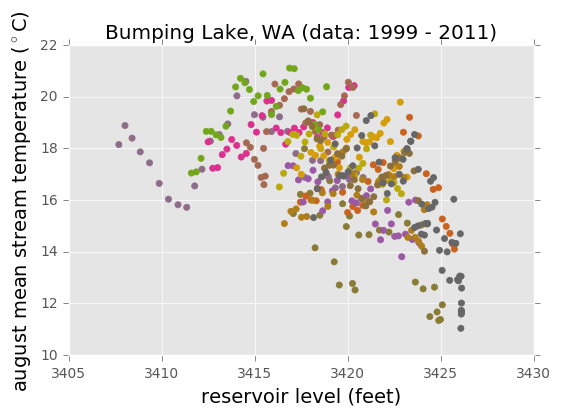

In [170]:
yearx = (merged_data.year - 1998)/(merged_data.year.max() - merged_data.year.min())
years_color =  merged_data.year ** 2 / (1 + merged_data.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Bumping Lake, WA (data: 1999 - 2011)')
plt.scatter(merged_data.res_level,merged_data.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

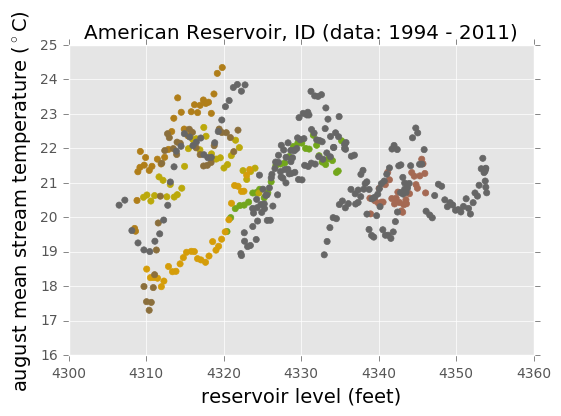

In [72]:
yearx = (merged_data_downstream.year - 1993)/(merged_data_downstream.year.max() - merged_data_downstream.year.min())
years_color =  merged_data_downstream.year ** 2 / (1 + merged_data_downstream.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('American Reservoir, ID (data: 1994 - 2011)')
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

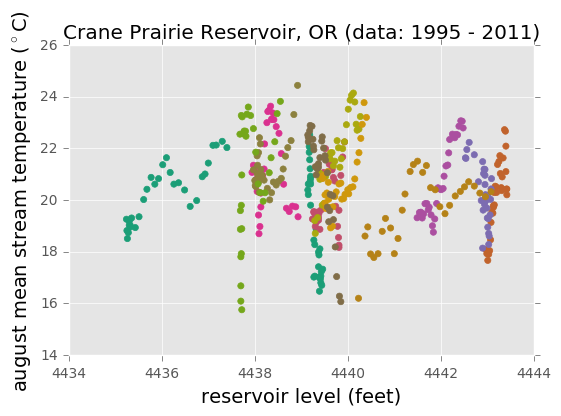

In [86]:
yearx = (merged_data_downstream.year - 1994)/(merged_data_downstream.year.max() - merged_data_downstream.year.min())
years_color =  merged_data_downstream.year ** 2 / (1 + merged_data_downstream.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Crane Prairie Reservoir, OR (data: 1995 - 2011)')
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

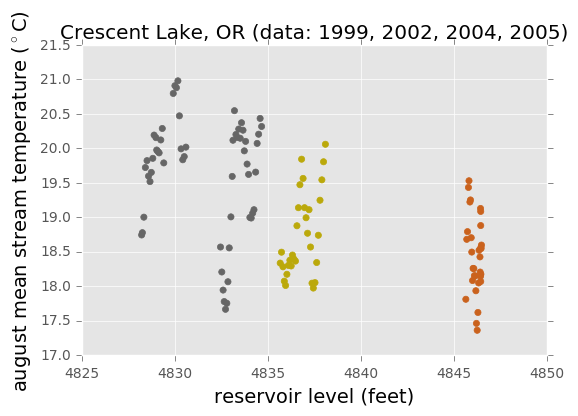

In [106]:
yearx = (merged_data_downstream.year - 1998)/(merged_data_downstream.year.max() - merged_data_downstream.year.min())
years_color =  merged_data_downstream.year ** 2 / (1 + merged_data_downstream.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Crescent Lake, OR (data: 1999, 2002, 2004, 2005)')
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

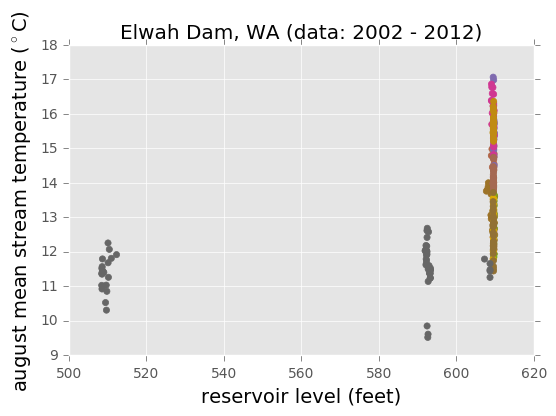

In [19]:
yearx = (merged_data_downstream.year - 2001)/(merged_data_downstream.year.max() - merged_data_downstream.year.min())
years_color =  merged_data_downstream.year ** 2 / (1 + merged_data_downstream.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Elwah Dam, WA (data: 2002 - 2012)')
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

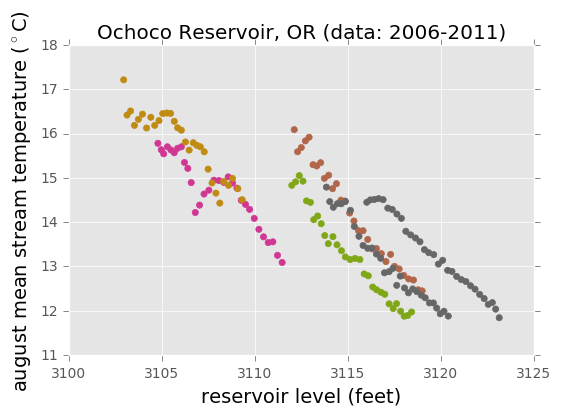

In [42]:
yearx = (merged_data_downstream.year - 2005)/(merged_data_downstream.year.max() - merged_data_downstream.year.min())
years_color =  merged_data_downstream.year ** 2 / (1 + merged_data_downstream.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Ochoco Reservoir, OR (data: 2006-2011)')
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

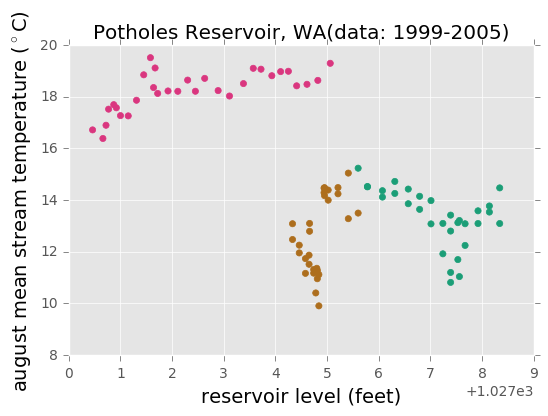

In [74]:
yearx = (merged_data_downstream.year - 1998)/(merged_data_downstream.year.max() - merged_data_downstream.year.min())
years_color =  merged_data_downstream.year ** 2 / (1 + merged_data_downstream.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Potholes Reservoir, WA(data: 1999-2005)')
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

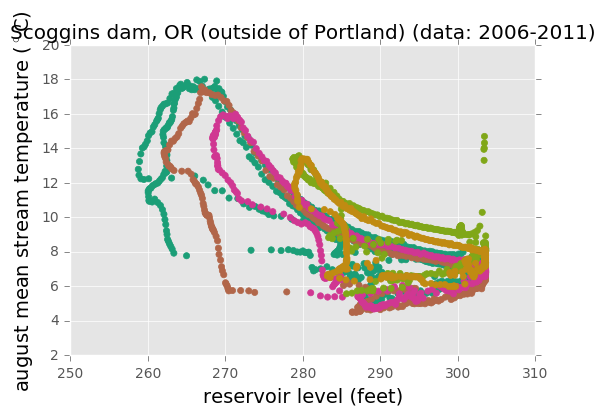

In [37]:
yearx = (merged_data_downstream.year - 2007)/(merged_data_downstream.year.max() - merged_data_downstream.year.min())
years_color =  merged_data_downstream.year ** 2 / (1 + merged_data_downstream.year ** 2)
Blues = plt.get_cmap('Dark2')
#print(Blues(years_color))
plt.title('Scoggins dam, OR (outside of Portland) (data: 2006-2011)')
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DailyMean, color=Blues(yearx))
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

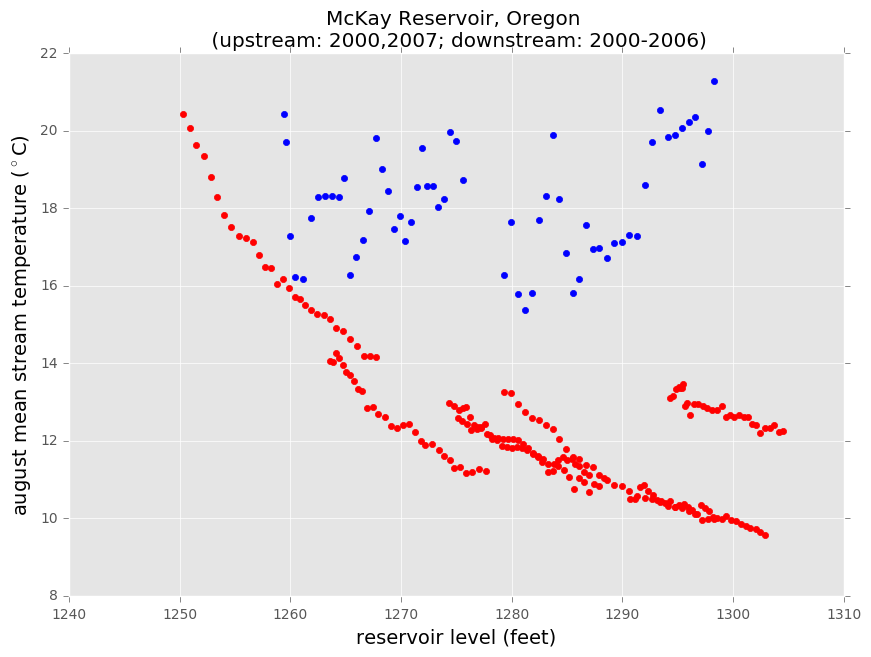

In [263]:
plt.figure(figsize=[10,7])
plt.title('McKay Reservoir, Oregon \n (upstream: 2000,2007; downstream: 2000-2006) \n upstream-blue, downstream-red')

plt.scatter(merged_data_upstream.res_level,merged_data_upstream.DAILYMEAN, color='blue' )    # 
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color='red')    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

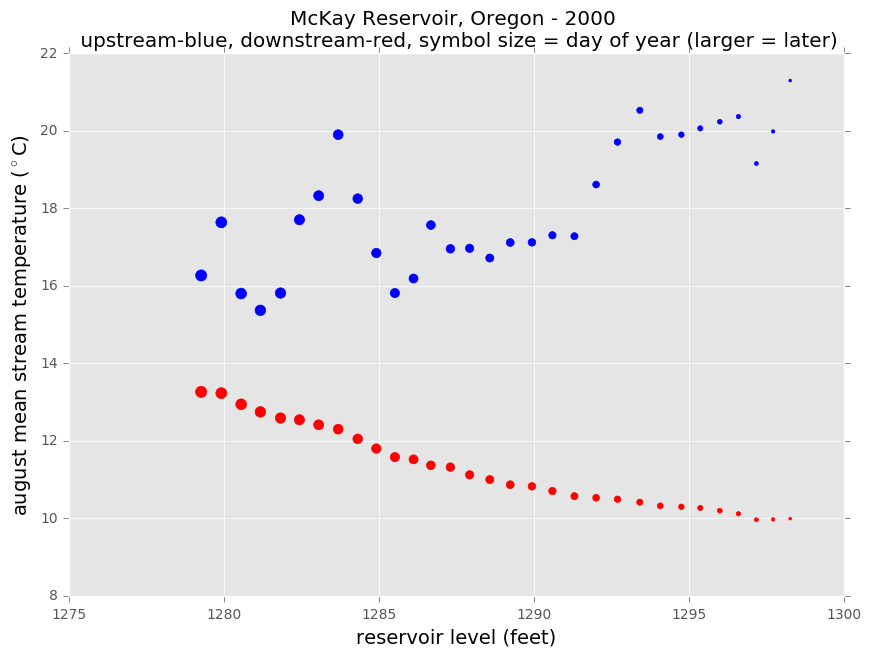

In [32]:
year_plotx = 2000
plt.figure(figsize=[10,7])
plt.title('McKay Reservoir, Oregon - 2000 \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstream.res_level[merged_data_upstream.year==year_plotx],
            merged_data_upstream.DAILYMEAN[merged_data_upstream.year==year_plotx], color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 )  )    # 
plt.scatter(merged_data_downstream.res_level[merged_data_downstream.year==year_plotx],
            merged_data_downstream.DAILYMEAN[merged_data_downstream.year==year_plotx], color='red', 
            s=( (merged_data_downstream.index.dayofyear-212)*2 ) )    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

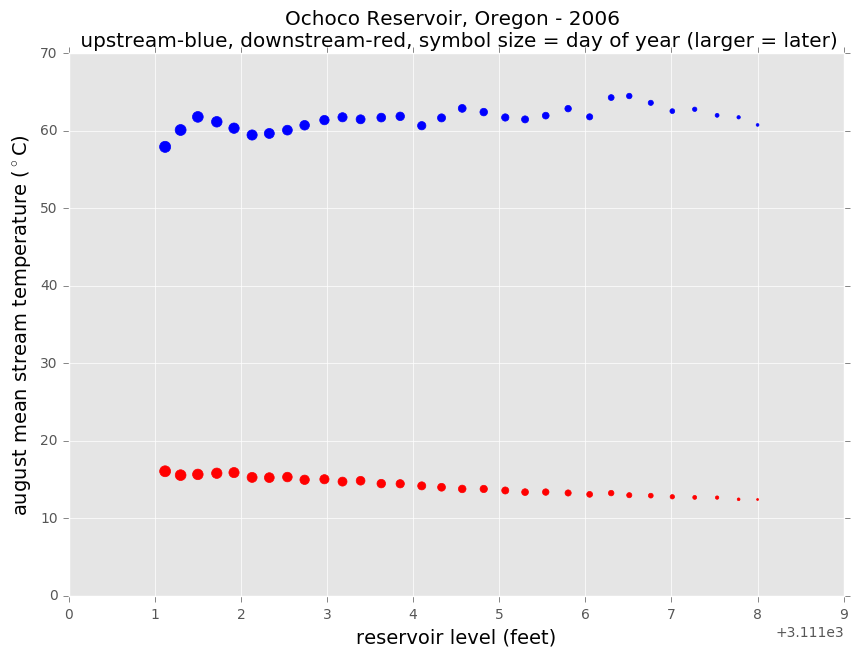

In [45]:
year_plotx = 2006
plt.figure(figsize=[10,7])
plt.title('Ochoco Reservoir, Oregon - 2006 \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstream.res_level[merged_data_upstream.year==year_plotx],
            merged_data_upstream.DAILYMEAN[merged_data_upstream.year==year_plotx], color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 )  )    # 
plt.scatter(merged_data_downstream.res_level[merged_data_downstream.year==year_plotx],
            merged_data_downstream.DAILYMEAN[merged_data_downstream.year==year_plotx], color='red', 
            s=( (merged_data_downstream.index.dayofyear-212)*2 ) )    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


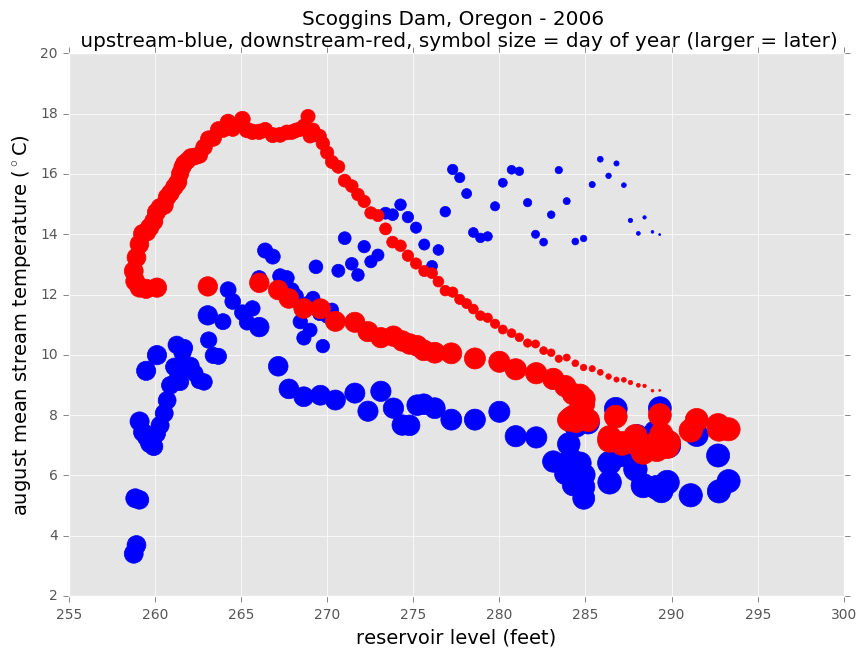

In [38]:
year_plotx = 2006
plt.figure(figsize=[10,7])
plt.title('Scoggins Dam, Oregon - 2006 \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstream.res_level[merged_data_upstream.year==year_plotx],
            merged_data_upstream.DailyMean[merged_data_upstream.year==year_plotx], color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 )  )    # 
plt.scatter(merged_data_downstream.res_level[merged_data_downstream.year==year_plotx],
            merged_data_downstream.DailyMean[merged_data_downstream.year==year_plotx], color='red', 
            s=( (merged_data_downstream.index.dayofyear-212)*2 ) )    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

In [71]:
merged_data_upstreamB.head(1)

,res_level,OBSPRED_ID,NorWeST_ID,SampleYear,SampleDate,DailyMax,DailyMin,DailyMean,DailySD,Nobs,DailyRange,DATE,year
2007-01-01,286.73,4939.0,OregonCoast_4939,2007.0,1/1/2007 0:00:00,5.76,5.04,5.39,0.26,96,0.72,2007-01-01,2007


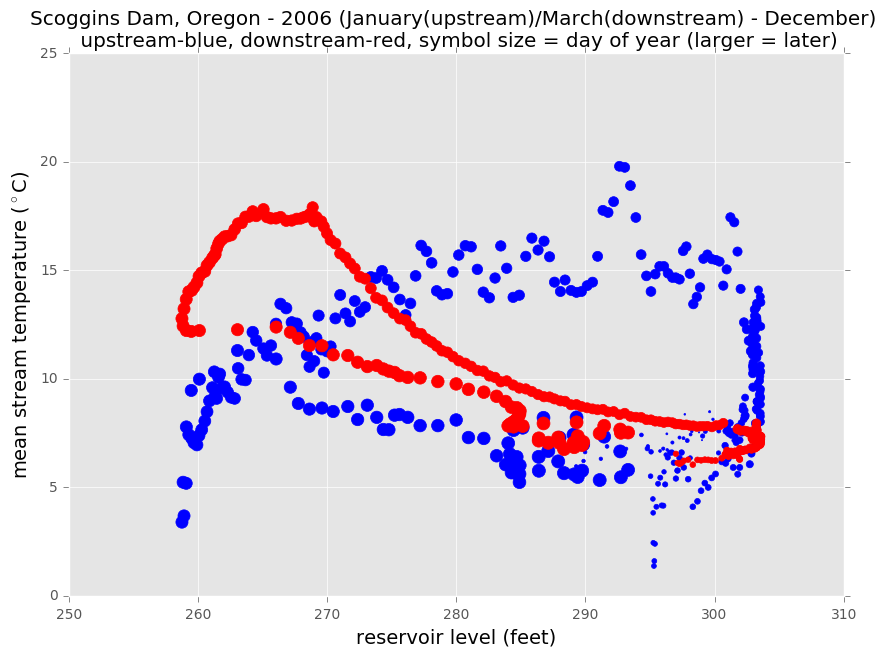

In [66]:
year_plotx = 2006

merged_data_upstreamB = merged_data_upstream[merged_data_upstream.year==year_plotx]
merged_data_downstreamB = merged_data_downstream[merged_data_downstream.year==year_plotx]

plt.figure(figsize=[10,7])
plt.title('Scoggins Dam, Oregon - 2006 (January(upstream)/March(downstream) - December) \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstreamB.res_level,
            merged_data_upstreamB.DailyMean, color='blue', 
            s=( (merged_data_upstreamB.index.dayofyear/20)*5 ) )     # 
plt.scatter(merged_data_downstreamB.res_level,
            merged_data_downstreamB.DailyMean, color='red', 
            s=( (merged_data_downstreamB.index.dayofyear/20)*5 ) )    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('mean stream temperature ($^\circ$C)',fontsize=14, color='black')

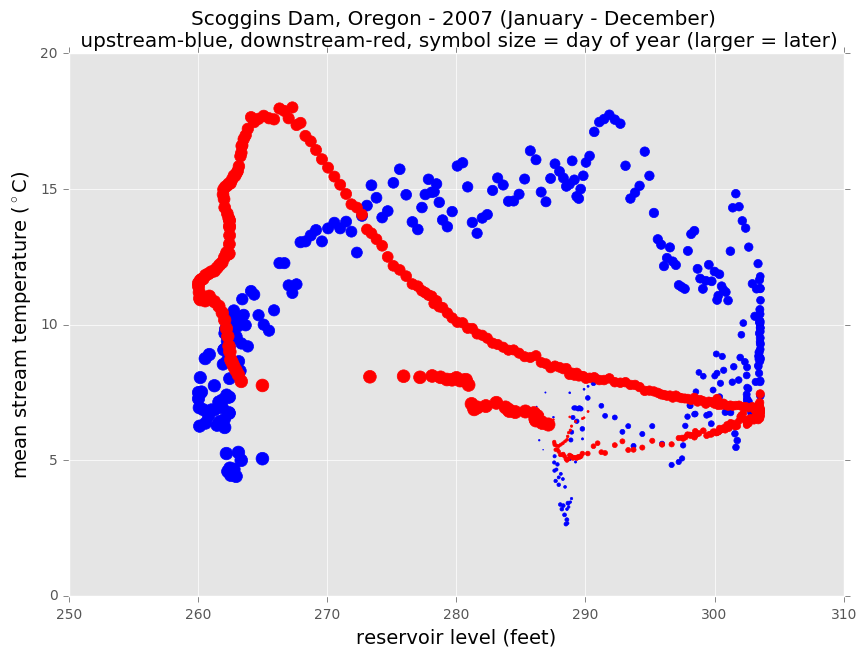

In [72]:
year_plotx = 2007

merged_data_upstreamB = merged_data_upstream[merged_data_upstream.year==year_plotx]
merged_data_downstreamB = merged_data_downstream[merged_data_downstream.year==year_plotx]

plt.figure(figsize=[10,7])
plt.title('Scoggins Dam, Oregon - 2007 (January - December) \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstreamB.res_level,
            merged_data_upstreamB.DailyMean, color='blue', 
            s=( (merged_data_upstreamB.index.dayofyear/20)*5 ) )     # 
plt.scatter(merged_data_downstreamB.res_level,
            merged_data_downstreamB.DailyMean, color='red', 
            s=( (merged_data_downstreamB.index.dayofyear/20)*5 ) )    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('mean stream temperature ($^\circ$C)',fontsize=14, color='black')

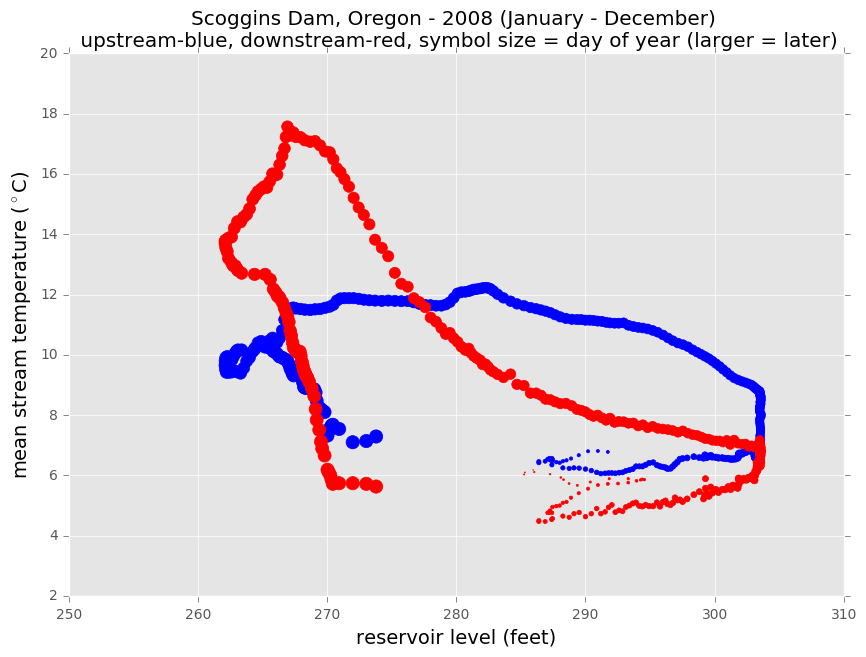

In [73]:
year_plotx = 2008

merged_data_upstreamB = merged_data_upstream[merged_data_upstream.year==year_plotx]
merged_data_downstreamB = merged_data_downstream[merged_data_downstream.year==year_plotx]

plt.figure(figsize=[10,7])
plt.title('Scoggins Dam, Oregon - 2008 (January - December) \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstreamB.res_level,
            merged_data_upstreamB.DailyMean, color='blue', 
            s=( (merged_data_upstreamB.index.dayofyear/20)*5 ) )     # 
plt.scatter(merged_data_downstreamB.res_level,
            merged_data_downstreamB.DailyMean, color='red', 
            s=( (merged_data_downstreamB.index.dayofyear/20)*5 ) )    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('mean stream temperature ($^\circ$C)',fontsize=14, color='black')

(array([ 167.,  180.,  185.,  180.,  180.,  185.,  180.,  185.,  180.,  153.]),
 array([   1. ,   37.4,   73.8,  110.2,  146.6,  183. ,  219.4,  255.8,
         292.2,  328.6,  365. ]),
 <a list of 10 Patch objects>)

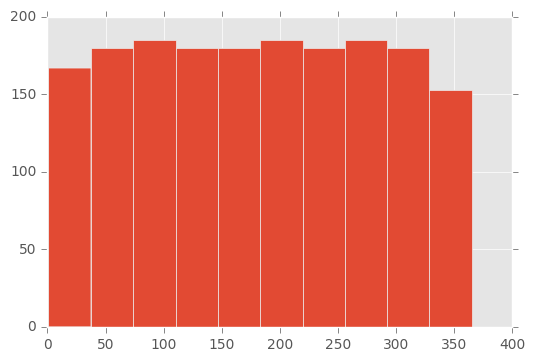

In [47]:
plt.hist(merged_data_upstream.index.dayofyear[merged_data_upstream.year==year_plotx])

In [45]:
print(year_plotx)

2008


/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/rniemeyr/anaconda/envs/my_env/lib/python3.4/site-packages/IPython/kernel/__main__.py:10: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


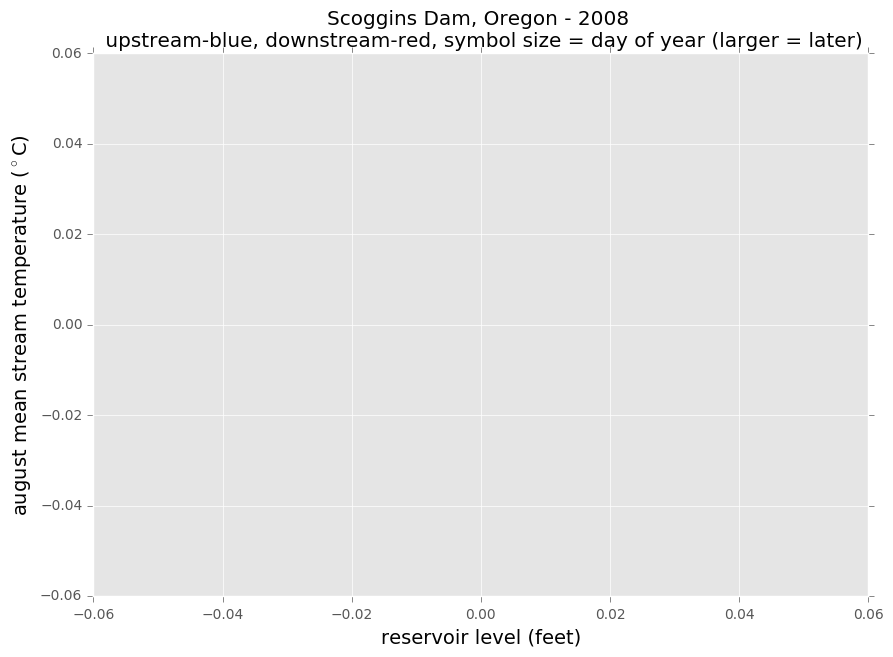

In [42]:
year_plotx = 2008
plt.figure(figsize=[10,7])
plt.title('Scoggins Dam, Oregon - 2008 \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstream.res_level[merged_data_upstream.year==year_plotx],
            merged_data_upstream.DailyMean[merged_data_upstream.year==year_plotx], color='blue', 
            s=( (merged_data_upstream.index.dayofyear[merged_data_upstream.year==year_plotx]-212)*1.1 )  )    # 
plt.scatter(merged_data_downstream.res_level[merged_data_downstream.year==year_plotx],
            merged_data_downstream.DailyMean[merged_data_downstream.year==year_plotx], color='red', 
            s=( (merged_data_downstream.index.dayofyear[merged_data_downstream.year==year_plotx]-212)*1.1 ) )    # 
plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

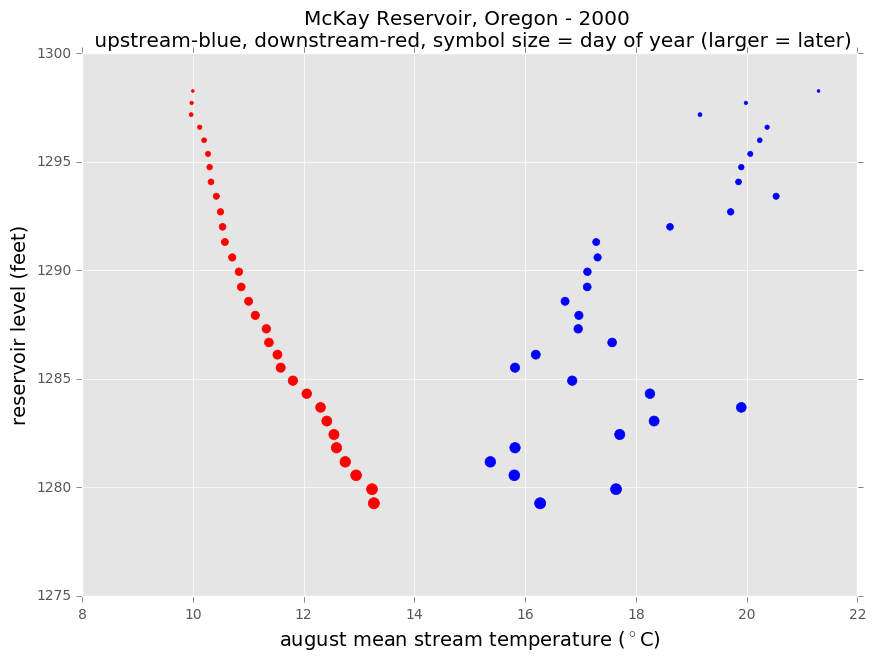

In [33]:
year_plotx = 2000
plt.figure(figsize=[10,7])
plt.title('McKay Reservoir, Oregon - 2000 \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstream.DAILYMEAN[merged_data_upstream.year==year_plotx],
            merged_data_upstream.res_level[merged_data_upstream.year==year_plotx],color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 )  )    # 
plt.scatter(merged_data_downstream.DAILYMEAN[merged_data_downstream.year==year_plotx], 
            merged_data_downstream.res_level[merged_data_downstream.year==year_plotx], color='red', 
            s=( (merged_data_downstream.index.dayofyear-212)*2 ) )    # 
plt.ylabel('reservoir level (feet)',fontsize=14, color='black')
plt.xlabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')

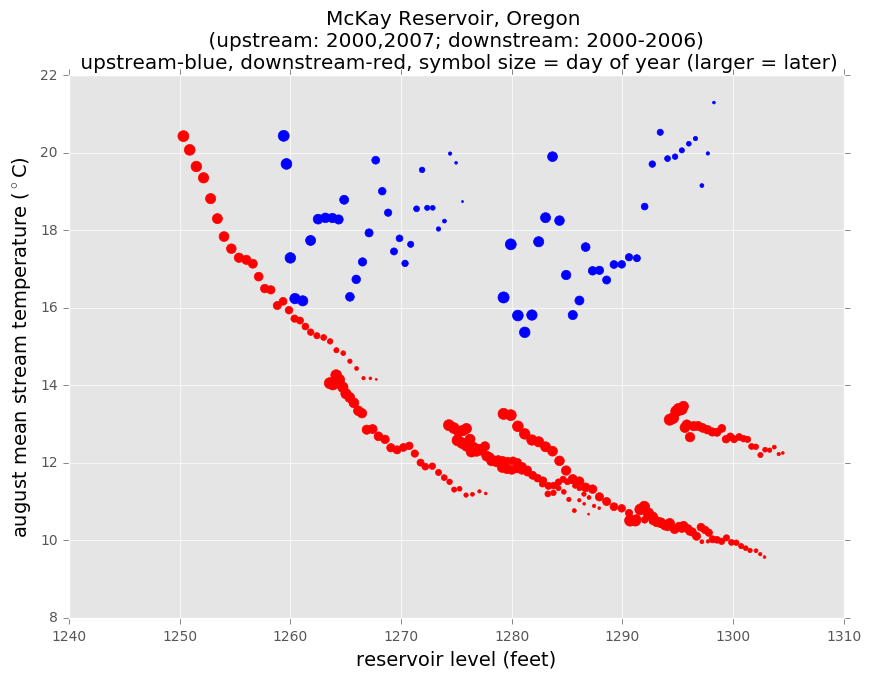

In [31]:
plt.figure(figsize=[10,7])
plt.title('McKay Reservoir, Oregon \n (upstream: 2000,2007; downstream: 2000-2006) \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')


plt.scatter(merged_data_upstream.res_level,merged_data_upstream.DAILYMEAN, color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 )  )    # 
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color='red', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 ) )    # RBM (yixin) - segment 1

plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')



(3100, 3125)

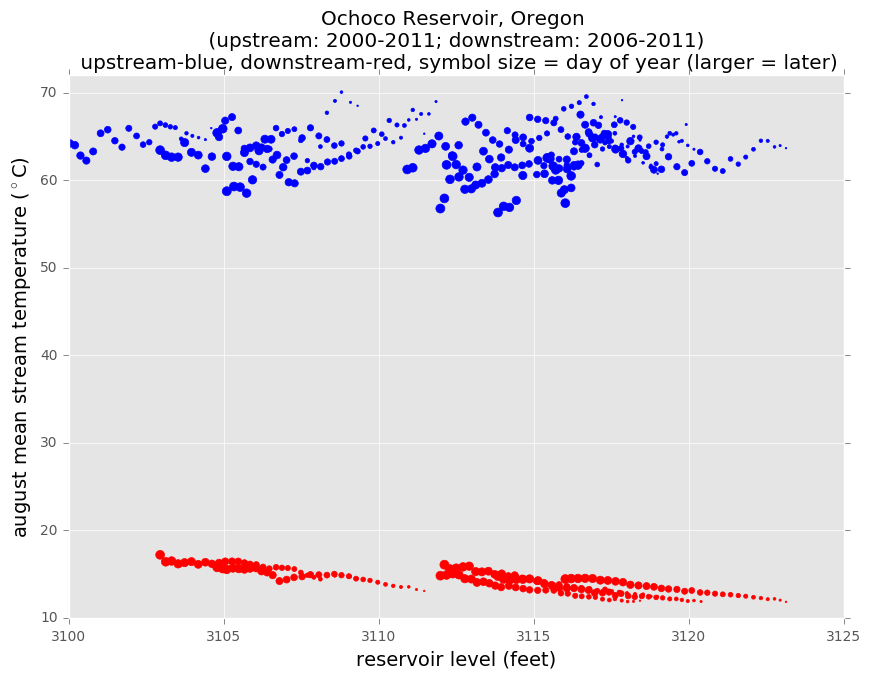

In [51]:
plt.figure(figsize=[10,7])
plt.title('Ochoco Reservoir, Oregon \n (upstream: 2000-2011; downstream: 2006-2011) \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')

plt.scatter(merged_data_upstream.res_level,merged_data_upstream.DAILYMEAN, color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*1.3 )  )    # 
plt.scatter(merged_data_downstream.res_level,merged_data_downstream.DAILYMEAN, color='red', 
            s=( (merged_data_upstream.index.dayofyear-212)*1.3 ) )    # RBM (yixin) - segment 1

plt.xlabel('reservoir level (feet)',fontsize=14, color='black')
plt.ylabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')
plt.ylim(10,72)
plt.xlim(3100,3125)

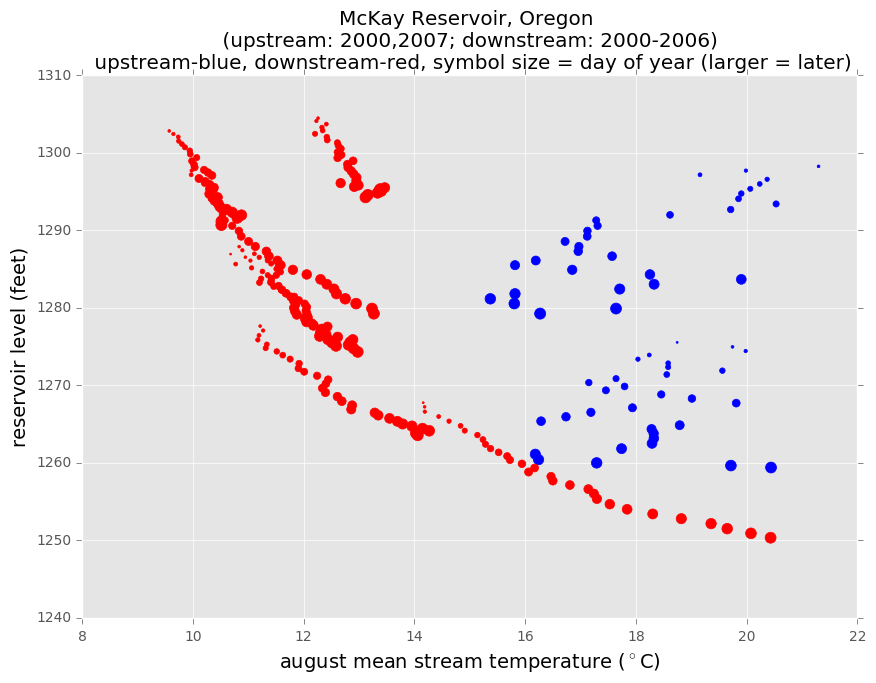

In [34]:
plt.figure(figsize=[10,7])
plt.title('McKay Reservoir, Oregon \n (upstream: 2000,2007; downstream: 2000-2006) \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')


plt.scatter(merged_data_upstream.DAILYMEAN,merged_data_upstream.res_level, color='blue', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 )  )    # 
plt.scatter(merged_data_downstream.DAILYMEAN,merged_data_downstream.res_level, color='red', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 ) )    # RBM (yixin) - segment 1

plt.ylabel('reservoir level (feet)',fontsize=14, color='black')
plt.xlabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')



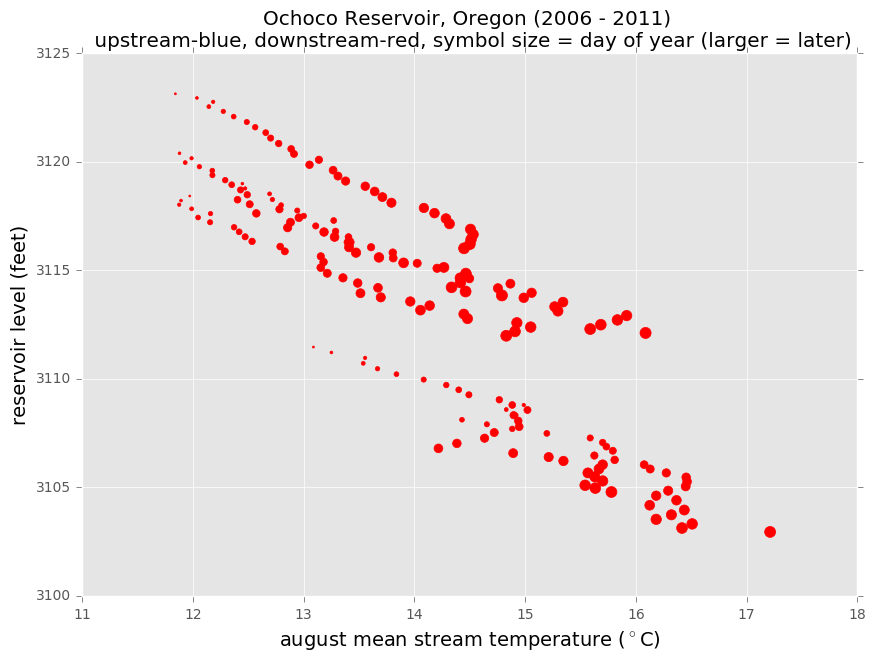

In [47]:
plt.figure(figsize=[10,7])
plt.title('Ochoco Reservoir, Oregon (2006 - 2011) \n upstream-blue, downstream-red, symbol size = day of year (larger = later)')


plt.scatter(merged_data_downstream.DAILYMEAN,merged_data_downstream.res_level, color='red', 
            s=( (merged_data_upstream.index.dayofyear-212)*2 ) )    # RBM (yixin) - segment 1

plt.ylabel('reservoir level (feet)',fontsize=14, color='black')
plt.xlabel('august mean stream temperature ($^\circ$C)',fontsize=14, color='black')



In [22]:
from climata.usgs import DailyValueIO

data = DailyValueIO(
    start_date="2014-01-01",
    end_date="2014-12-31",
    county="27055",
)

for series in data:
    #print(series)
    for row in series.data:
        #print(row)

SyntaxError: unexpected EOF while parsing (<ipython-input-22-2427aef7a701>, line 12)

In [93]:
# FUCNTIONS to 

import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'S':
        dd *= -1
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])

    return (lat)



In [83]:
import requests
sitex2 = 'sco'

link = "https://www.usbr.gov/pn/hydromet/decod_params.html"
f = requests.get(link)


pattern = '<A NAME="' + sitex2 + '"></A>'
print(pattern)
m = re.search(pattern, f.text)
if m:
    textx = f.text[m.regs[0][0]:m.regs[0][0]+300]
    latx = re.search('LAT', textx)
    latx2 = f.text[m.regs[0][0]+latx.regs[0][0]+4:m.regs[0][0]+latx.regs[0][0]+12]
    
    lonx = re.search('LONG', textx)
    lonx2 = f.text[m.regs[0][0]+lonx.regs[0][0]+5:m.regs[0][0]+lonx.regs[0][0]+14]
    print(latx2)
    print(lonx2)
    
else:
    print("Nothing found")
    
# print(f.text)

<A NAME="sco"></A>
found!
45-28-25
123-11-51


In [99]:
import re

def dms2dd(degrees, minutes, seconds):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    return dd;

def dd2dms(deg):
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2])

    return (lat)


parse_dms("""123-11-51"W""")

123.1975

In [100]:
print(latx2)

45-28-25


In [102]:
parse_dms(lonx2)

123.1975

In [92]:
parse_dms("""45°28'25"S""")

45.47361111111111

In [75]:
f.text[m.regs[0][0]:m.regs[0][0]+300]

'<A NAME="sco"></A>\n  SCO      Scoggins Dam & Henry Hagg Lake nr Forest Grove, OR  \n           Satellite ID=34822476, Satellite Channel=170\n           LAT=45-28-25  LONG=123-11-51   ELEV=  200.\n     AF      Reservoir Storage - Acre-Feet                               \n     FB      Forebay Elevation - '

In [66]:
print(m.lastindex)

None


In [56]:
import requests
sitex2 = 'sco'

link = "https://www.usbr.gov/pn/hydromet/decod_params.html"
f = requests.get(link)


pattern = '<A NAME="' + sitex2 + '"></A>'

print(len(f.text))

for i, line in enumerate(f.text):
    for match in re.finditer(pattern, line):
        print('Found on line %s: %s' % (i+1, match.groups()) )

254939


In [59]:
f.text[2:200]

'DOCTYPE html>\n<!-- template-v2015  -->\n<!--[if lte IE 7]><html class="no-js old-ie lte-ie7" lang="en" dir="ltr"><![endif]-->\n<!--[if lte IE 8]><html class="no-js old-ie lte-ie8 lte-ie7" lang="en" di'

In [48]:
import requests
sitex2 = 'sco'
link = "https://www.usbr.gov/pn/hydromet/decod_params.html"
f = requests.get(link)

pattern = '<A NAME="' + sitex + '"></A>'


    
print(f.text)

<!DOCTYPE html>
<!-- template-v2015  -->
<!--[if lte IE 7]><html class="no-js old-ie lte-ie7" lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 8]><html class="no-js old-ie lte-ie8 lte-ie7" lang="en" dir="ltr"><![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr"><!--<![endif]-->
<head>
  <!-- Head Content  -->
<meta charset="utf-8">

<!--[if gt IE 8 ]--><meta http-equiv="X-UA-Compatible" content="IE=Edge" /><!--<![endif]--><title>Hydromet Pacific Northwest Region | Bureau of Reclamation</title>
<meta name="description" content="Hydromet, Pacific Northwest Region, Bureau of Reclamation - Managing water and power in the West" />
<meta name="keywords" content="Hydromet, Pacific Northwest Region, Department of the Interior, Bureau of Reclamation, Water, Dams, Dam, Projects &amp; Facilties, Hydromet, Agrimet, hydropower" />
<meta name="author" content="Bureau of Reclamation" />
<meta name="publisher" content="Bureau of Reclamation" />
<meta name="created" content="201501